Dataset:

https://www.kaggle.com/alxmamaev/flowers-recognition/download

### Import Libraries

In [2]:
import os
import cv2
import numpy as np

# Encoding and split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt

folder_dir = '/kaggle/input/flowers-recognition/flowers'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Now the next step is to read each image in the data and create a label for each with the name of the folder:

In [3]:
data = []
label = []

SIZE = 128  # Crop the image to 128*128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

Now let’s convert the data into numerical values:

In [4]:
data_arr = np.array(data)
label_arr = np.array(label)

Now let’s use the Label encoder and normalize the data:

In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

The next step is to split the dataset into 80% training and 20% test sets:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Now let’s build a neural network model for the task of Flower Recognition:

In [7]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',activation='relu',input_shape=(SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation="softmax"))

Before compiling the model we need to create more training images to prevent overfitting:

In [8]:
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.20,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=True)

datagen.fit(X_train)

Now let’s compile the neural network model:

In [9]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                             epochs = epochs,
                             validation_data = (X_test, y_test),
                             verbose = 1)

/tmp/ipykernel_27/4089178233.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),


Epoch 1/64
108/108 [==============================] - 29s 165ms/step - loss: 1.5745 - accuracy: 0.3180 - val_loss: 1.3927 - val_accuracy: 0.3854
Epoch 2/64
108/108 [==============================] - 16s 148ms/step - loss: 1.3840 - accuracy: 0.3869 - val_loss: 1.2612 - val_accuracy: 0.4294
Epoch 3/64
108/108 [==============================] - 17s 153ms/step - loss: 1.2683 - accuracy: 0.4492 - val_loss: 1.2152 - val_accuracy: 0.5243
Epoch 4/64
108/108 [==============================] - 16s 146ms/step - loss: 1.1889 - accuracy: 0.5077 - val_loss: 1.0736 - val_accuracy: 0.5590
Epoch 5/64
108/108 [==============================] - 17s 156ms/step - loss: 1.1514 - accuracy: 0.5028 - val_loss: 1.0467 - val_accuracy: 0.5428
Epoch 6/64
108/108 [==============================] - 16s 148ms/step - loss: 1.1743 - accuracy: 0.5051 - val_loss: 1.0430 - val_accuracy: 0.5787
Epoch 7/64
108/108 [==============================] - 17s 156ms/step - loss: 1.1179 - accuracy: 0.5140 - val_loss: 1.1598 - val_ac

Now let’s let the model if it recognize flowers properly:

27/27 [==============================] - 0s 17ms/step


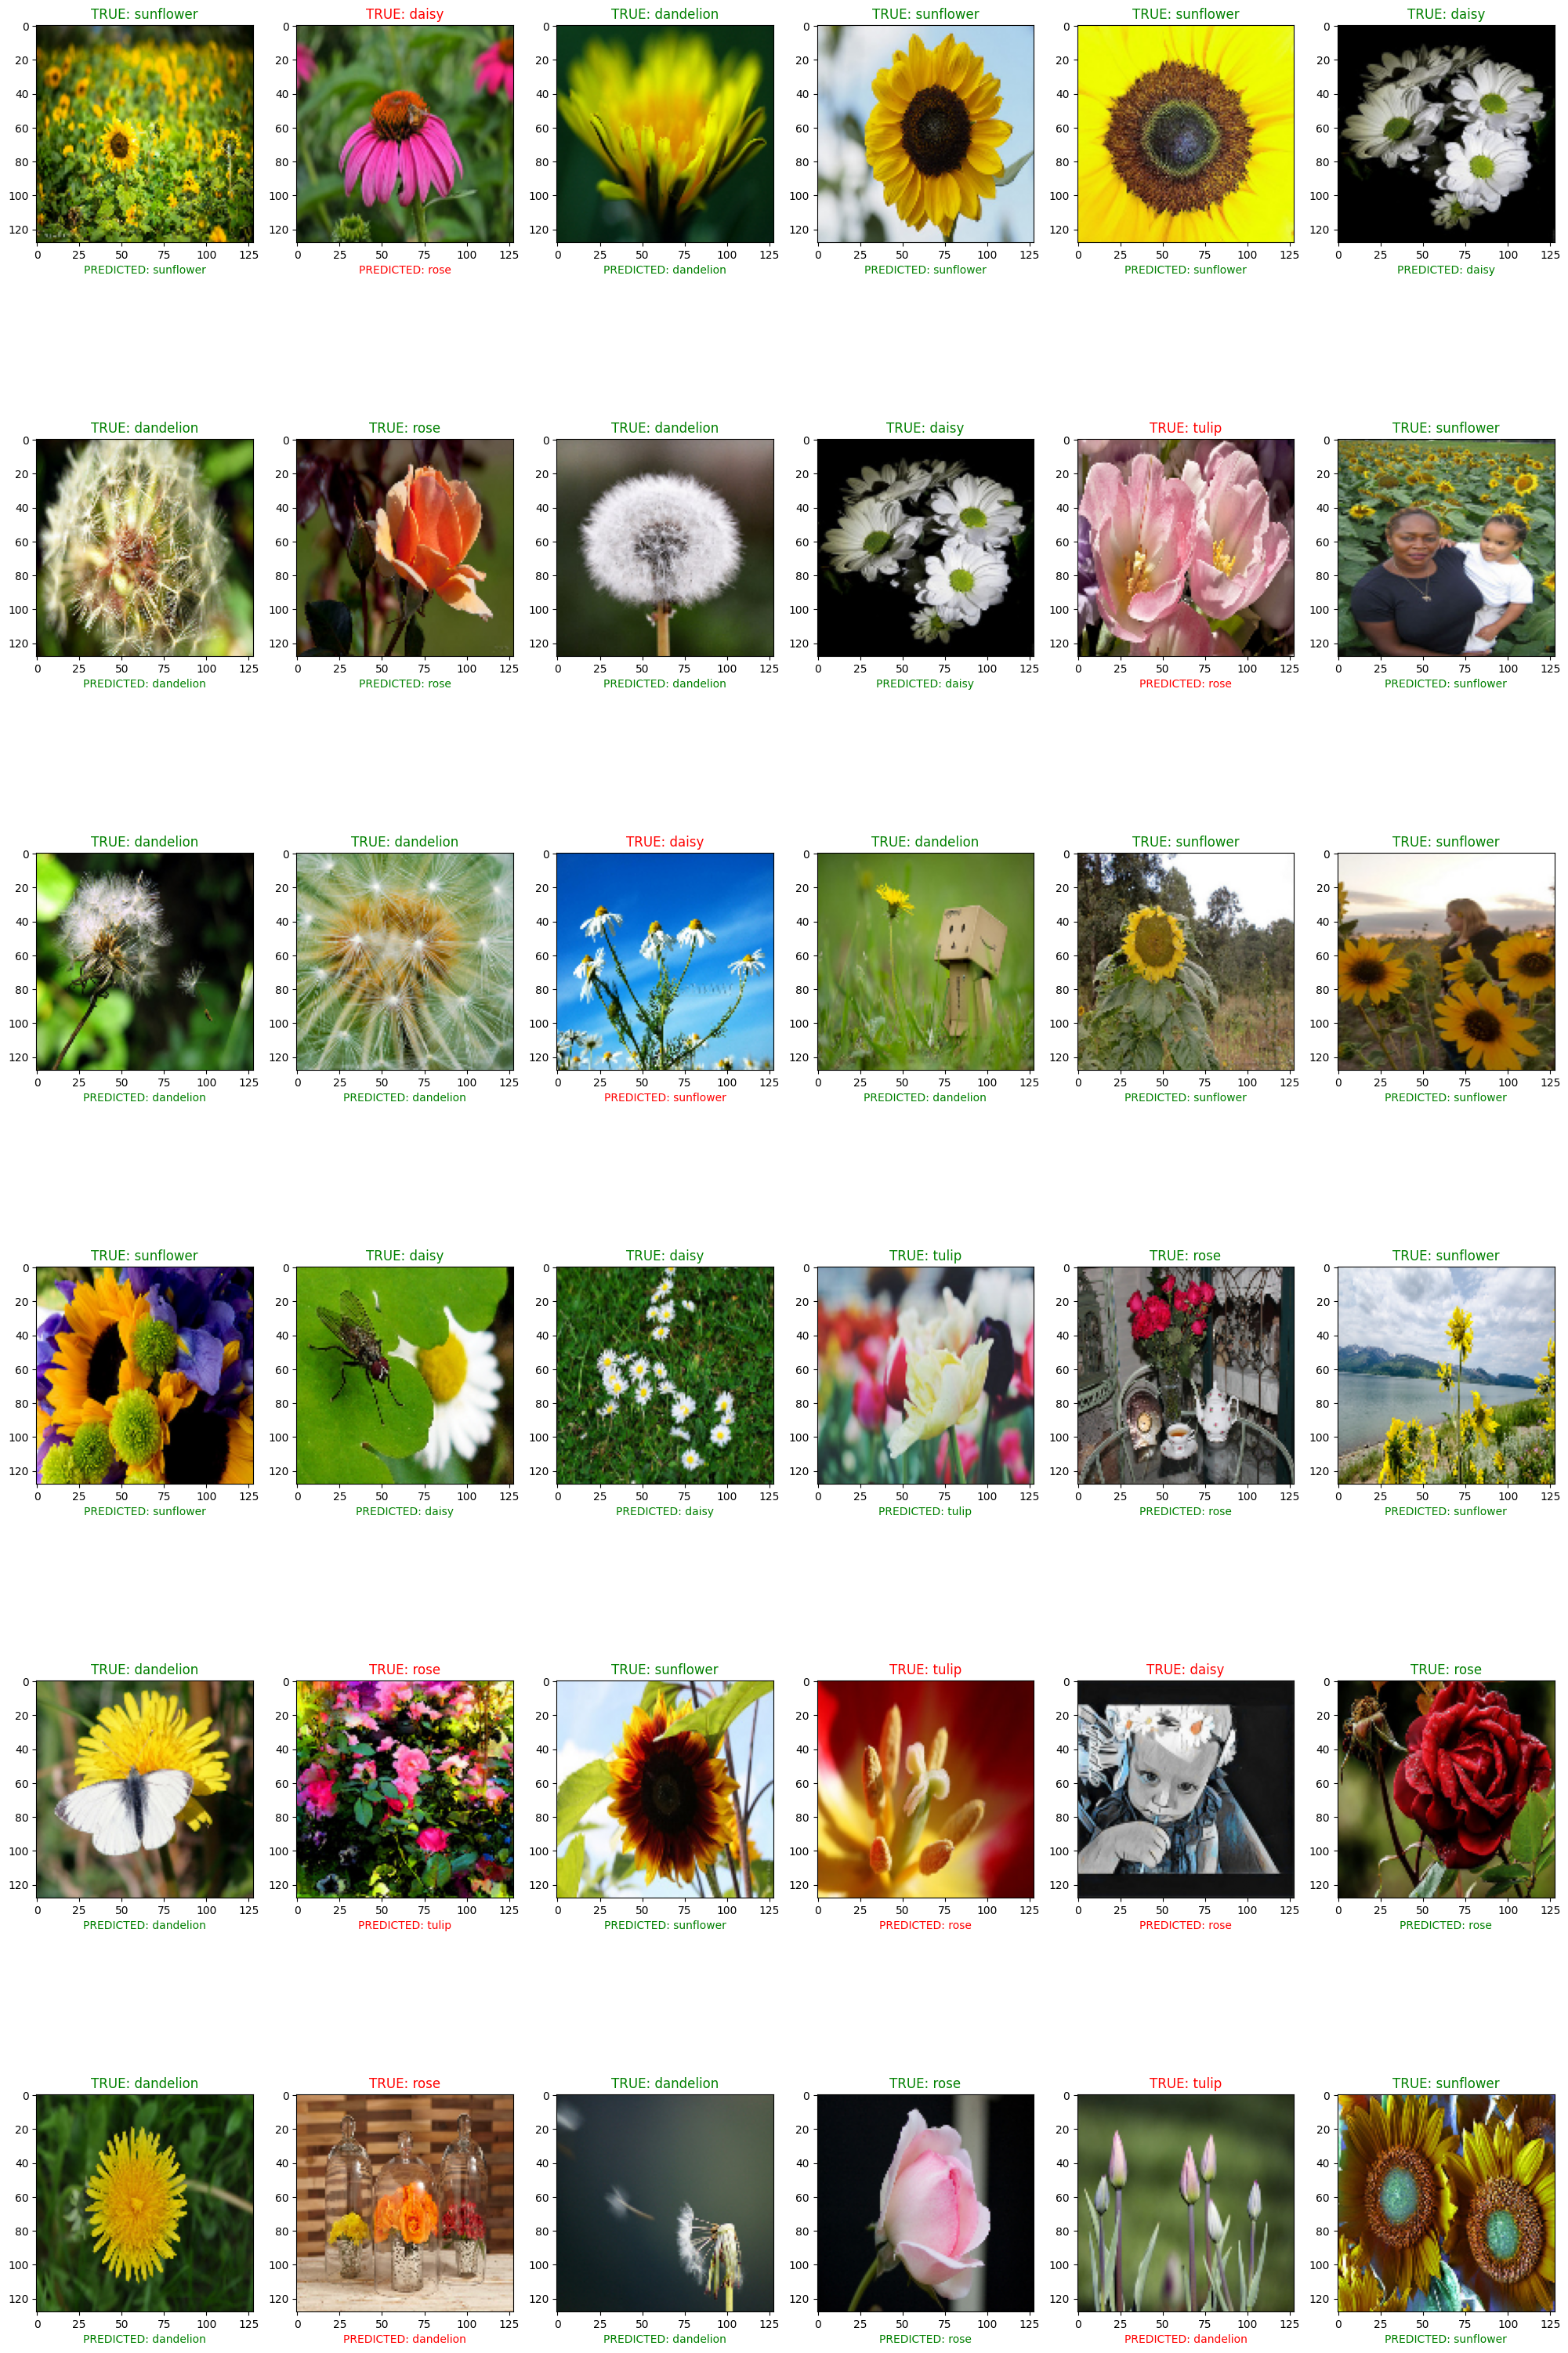

In [10]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

Source:

https://thecleverprogrammer.com/2020/11/24/flower-recognition-with-python/